# Ecoulement de Poiseuille - capillaire à section rectangulaire

### Largeur capillaire = w, coordonnée x
### hauteur (épaisseur) capillaire = h, coordonnées y
### Direction de l'écoulement selon la coordonnée z

In [48]:

%matplotlib inline
# définition des dimensions du capillaire
h = 0.1e-3 # hauteur du canal, en m DIMENSION y
w = 1e-3 # largeur du canal, en m DIMENSION x
L = 0.1 # longueur du capillaire, en m

# paramètre du fluide
eta = 1e-3 # viscosité du fluide, en Pa.s 

# perte de charge
DP = 100 # perte de charge totale sur la longueur du capillaire, en Pa

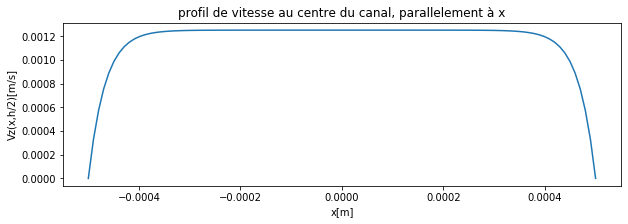

In [49]:

from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np
import matplotlib.pyplot as plt
from math import pi

from matplotlib.ticker import LinearLocator, FormatStrFormatter


n = 20 # indice maximal de la somme (somme infinie en théorie)

def somme(x,y):
    somme = 0
    for k in range (0,n):
        somme += (1.0/(2*k+1)**3)*(1-(np.cosh((2*k+1)*pi*x/h))/(np.cosh((2*k+1)*pi*(w/(2*h)))))*np.sin((2*k+1)*pi*y/h) # l'indice de somme est (2*k+1) car on ne somme que sur les entiers impairs
    return somme

def vz(x,y):
    return (4*h**2*DP)/(pi**3*eta*L)*somme(x,y)


fig = plt.figure(figsize=(10,3)) # taille de la figure en inches
x = np.linspace(-w/2, w/2,100)
plt.plot(x,vz(x,h/2))
plt.xlabel('x[m]')
plt.ylabel('Vz(x,h/2)[m/s]')
plt.title('profil de vitesse au centre du canal, parallelement à x')
plt.show()

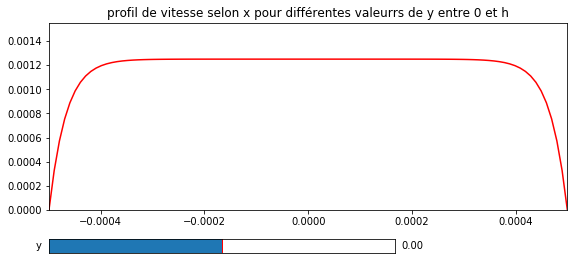

In [41]:
y_min = 0    # the minimial value of the paramater
y_max = h   # the maximal value of the paramater
y_init = h/2   # the value of the parameter a to be used initially, when the graph is created
axe_figure = plt.axes([0.1, 0.2, 1.2, 0.65])
slider_axe = plt.axes([0.1, 0.05, 0.8, 0.05])

# in axe_figure we plot the function with the initial value of the parameter y
plt.axes(axe_figure) # select axe_figure
plt.title('profil de vitesse selon x pour différentes valeurrs de y entre 0 et h')
vz_plot, = plt.plot(x, vz(x,y_init), 'r')
plt.xlim(-w/2, w/2)
plt.ylim(0, vz(0,h/2)+0.0003)

# here we create the slider
a_slider = Slider(slider_axe,     # the axes object containing the slider
                  'y',            # the name of the slider parameter
                  y_min,          # minimal value of the parameter
                  y_max,          # maximal value of the parameter
                  valinit=y_init  # initial value of the parameter
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(y):
    vz_plot.set_ydata(vz(x,y)) # set new y-coordinates of the plotted points
    fig.canvas.draw_idle()          # redraw the plot
    
# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)

plt.show()

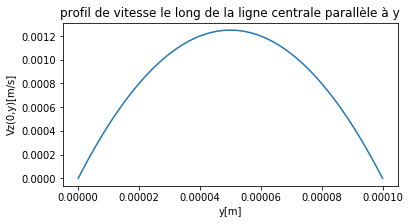

In [42]:
fig = plt.figure(figsize=(6,3)) # taille de la figure
y = np.linspace(0, h, 100)
plt.plot(y,vz(0,y))
plt.xlabel('y[m]')
plt.ylabel('Vz(0,y)[m/s]')
plt.title('profil de vitesse le long de la ligne centrale parallèle à y')
plt.show()

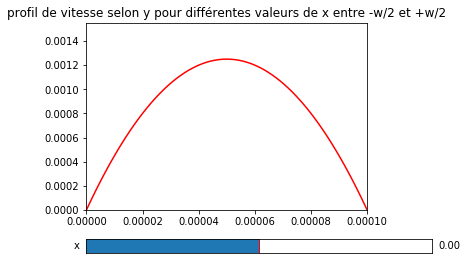

In [43]:
x_min = -w/2    # the minimial value of the paramater
x_max = w/2   # the maximal value of the paramater
x_init = 0   # the value of the parameter to be used initially, when the graph is created
axe_figure = plt.axes([0.1, 0.2, 0.65, 0.65])
slider_axe = plt.axes([0.1, 0.05, 0.8, 0.05])

# in axe_figure we plot the function with the initial value of the parameter x
plt.axes(axe_figure) # select axe_figure
plt.title('profil de vitesse selon y pour différentes valeurs de x entre -w/2 et +w/2')
vz_plot, = plt.plot(y, vz(x_init,y), 'r')
plt.xlim(0, h)
plt.ylim(0, vz(0,h/2)+0.0003)

# here we create the slider
a_slider = Slider(slider_axe,     # the axes object containing the slider
                  'x',            # the name of the slider parameter
                  x_min,          # minimal value of the parameter
                  x_max,          # maximal value of the parameter
                  valinit=x_init  # initial value of the parameter
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(x):
    vz_plot.set_ydata(vz(x,y)) # set new y-coordinates of the plotted points
    fig.canvas.draw_idle()          # redraw the plot
    
# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)

plt.show()

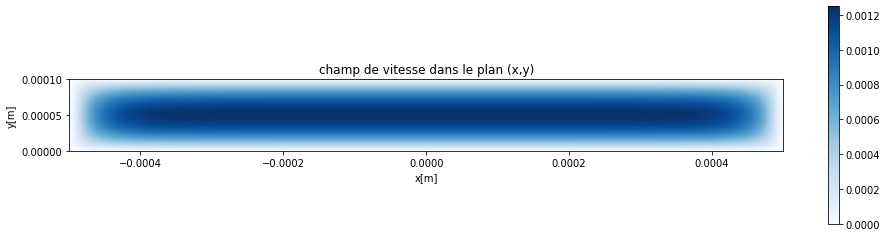

In [44]:
from matplotlib import cm

X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(16,4))
plt.imshow(vz(X,Y), interpolation="bicubic",
           origin="lower", extent=[-w/2,w/2,0,h],cmap=cm.Blues)
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.title('champ de vitesse dans le plan (x,y)')
plt.colorbar()
plt.show()

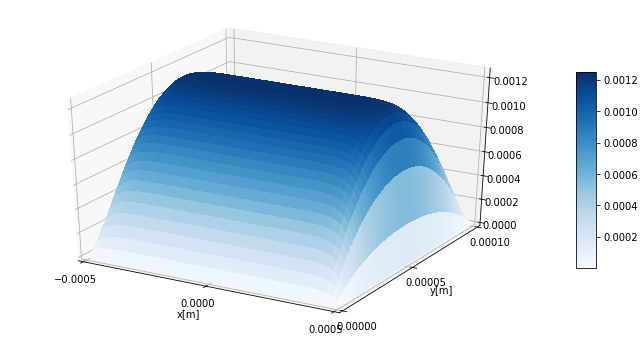

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
champ_vitesse = ax.plot_surface(X,Y,vz(X,Y),cmap=cm.Blues,antialiased=False)


ax.set_xlim3d(-w/2, w/2)
ax.set_xlabel('x[m]')
ax.xaxis.set_major_locator(LinearLocator(3))

ax.set_ylim3d(0, h)
ax.set_ylabel('y[m]')
ax.yaxis.set_major_locator(LinearLocator(3))

ax.zaxis.set_major_formatter(FormatStrFormatter('%.04f'))

fig.colorbar(champ_vitesse, shrink=0.6, aspect=10)
plt.show()